In [3]:
# implementing julia example of the kalman filter give in here
#https://praveshkoirala.com/2023/06/13/a-non-mathematical-introduction-to-kalman-filters-for-programmers/


In [49]:
import Pkg
Pkg.add("Distributions")

using Random
using Distributions
using Statistics
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [50]:

function generate_random_number(mean::Float64, variance::Float64)
    std_dev = sqrt(variance)
    dist = Normal(mean, std_dev)
    return rand(dist)
end

function new_position(last)
    velocity=10
    wind=generate_random_number(0.0,2.0)
    wave=generate_random_number(0.0,0.1)
    return last+velocity+wind+wave
    
end


new_position (generic function with 1 method)

In [51]:
true_position = [0, 9, 19.2, 28, 38.1, 48.5, 57.2, 66.2,
                 77.5, 85, 95.2];

In [52]:
# sensor
function sensor(t)
    sensor_noise=0.0
    if t==3
        sensor_noise=generate_random_number(5.0,10.0)
    elseif t==6
        sensor_noise=generate_random_number(-5.0,10.0)    
    else
        sensor_noise=generate_random_number(0.0,1.0)
    end
    return true_position[t]+sensor_noise    
            
end

sensor (generic function with 1 method)

In [53]:
# new position at t=1 if the last one t=0 was 0
@show new_position(0)
@show sensor(2)

new_position(0) = 7.580108196552499
sensor(2) = 10.10435068899034


10.10435068899034

In [54]:
# simple average of the 
function combine(A,B,trustA,trustB)
    total_trust=trustA+trustB
    return (A*trustA+B*trustB)/total_trust
end
  

combine (generic function with 1 method)

In [55]:
@show combine(9.37, 8.98, 10, 1)
@show combine(9.37, 8.98, 1, 10)

combine(9.37, 8.98, 10, 1) = 9.334545454545454
combine(9.37, 8.98, 1, 10) = 9.015454545454547


9.015454545454547

In [80]:
# find the updated position per passenger at t seconds
function update(t,last)
    velocity_updates=[]
    sensor_updates=[]
    for p in 1:1000
        push!(velocity_updates, new_position(last[p]))
        push!(sensor_updates,sensor(t+1))            
    end
    
    fluctuation_velocity=var(velocity_updates)
    fluctuation_sensor=var(sensor_updates)
        
    #calcualte the trust of the readings which is inverse of variance
    trust_velocity=1/fluctuation_velocity
    trust_sensor=1/fluctuation_sensor
    #combine these together for each passenger
    combined=[]
    for p in 1:1000
        push!(combined,combine(velocity_updates[p],sensor_updates[p],trust_velocity,trust_sensor ))
    end
    
    return sensor_updates,velocity_updates,combined
end
    

update (generic function with 1 method)

updatePlot (generic function with 1 method)

In [98]:
# run the kalman filter for 10 seconds
estimated_positions=zeros(1000)
_sensor=zeros(1000)
_velocity=zeros(100)
sensor_avg=[]
velocity_avg=[]
est_pos_avg=[]

for t in range(1,stop=10,step=1)   # ten seconds
    @show t
  _sensor, _velocity, estimated_positions = update(t, estimated_positions)
    push!(sensor_avg,mean(_sensor))
    push!(velocity_avg,mean(_velocity))
    push!(est_pos_avg,mean(estimated_positions))

end


t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10


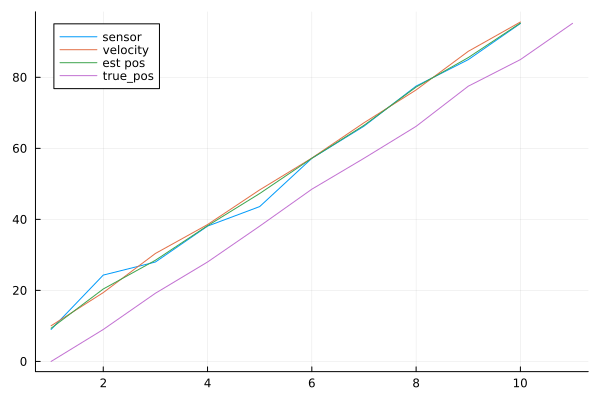

In [106]:
plot(sensor_avg,label="sensor")
plot!(velocity_avg,label="velocity")
plot!(est_pos_avg,label="est pos")
plot!(true_position,label="true_pos")


In [ ]:
plot!(velocity_avg,label=:"velocity")
plot!(est_pos_avg,label=:"est pos")
plot!(tru_position,label=:"true" pos")